# Más números felices!

A modo de continuación de la calculadora de números felices, propongo un contador de números felices y algunas formas de visualizarlo, a ver qué podemos sacar de aquí!

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

def cuantos_felices(n):
    """
    Función que determina si un número es feliz o no. Un número es feliz si la suma de los cuadrados de sus dígitos es igual a 1.
    Si por el contrario, la suma de los cuadrados de sus dígitos no es igual a 1, se repite el proceso de nuevo. Si nunca alcanza 1 y entra en un bucle, se
    dice que el número no es feliz. Este proceso converge a 1 o a un bucle muy rápido, por lo que solamente pondremos que el código se ejecute hasta 50
    iteraciones.

    Parámetros:
    n: int -> Número introducido por el usuario a verificar si es feliz o no.

    Return:
    Si el número es feliz, se devuelve un 1
    Si el número no es feliz, se devuelve un 0.
    """
    
    numero = str(n)
    digitos = []
    digitos_2 = []
    i = 0

    for elem in numero:
        digitos.append(elem)

    for num in digitos:
        cifra = int(num)
        digitos_2.append(cifra**2)

    suma = np.sum(digitos_2)

    while i < 50:
        if suma != 1:
            i += 1
            n = suma
            numero = str(n)

            digitos = []
            digitos_2 = []

            for elem in numero:
                digitos.append(elem)

            for num in digitos:
                cifra = int(num)
                digitos_2.append(cifra**2)

            suma = np.sum(digitos_2)
        else:
            return 1
    else:
        return 0

cuantos_felices(input())

1

Ahora contemos todos los que hay hasta un punto determinado

In [4]:
felices = []
cantidad = []
num = int(input("Introduce un número: "))
for n in range(1, num+1):
    if cuantos_felices(n) == True:
        felices.append(n)
        cantidad.append(len(felices))
print(f"Hay un total de {len(felices)} números felices menores o iguales a {num}, que son:\n {felices}")

Hay un total de 26 números felices menores o iguales a 150, que son:
 [1, 7, 10, 13, 19, 23, 28, 31, 32, 44, 49, 68, 70, 79, 82, 86, 91, 94, 97, 100, 103, 109, 129, 130, 133, 139]


In [ ]:
felices

In [ ]:
cantidad

Su graficación polar difiere de la graficación polar de otros números?

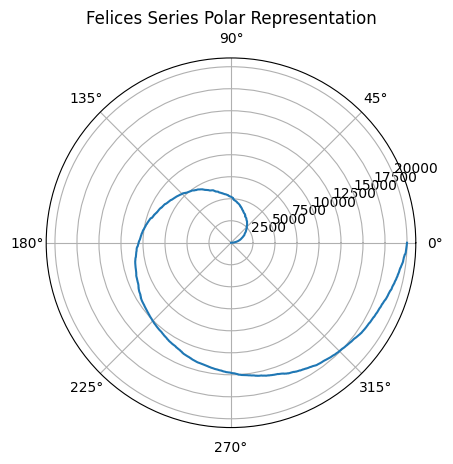

In [180]:
felices_series = pd.Series(felices)

angles = np.linspace(0, 2 * np.pi, len(felices_series))
radius = felices_series.values

# Step 3: Create Polar Axes
fig, ax = plt.subplots(subplot_kw={'polar': True})

# Step 4: Plot the Data
ax.plot(angles, radius)

# Step 5: Customize and Display the Plot
ax.set_title('Felices Series Polar Representation')
plt.show()

Qué hay del incremento entre cada número feliz?

In [201]:
felices_series = pd.Series(felices)

diff = felices_series.diff()

diff

0       NaN
1       6.0
2       3.0
3       3.0
4       6.0
       ... 
3033    4.0
3034    3.0
3035    2.0
3036    8.0
3037    1.0
Length: 3038, dtype: float64

In [202]:
diff.mean()

6.584129074744814

In [203]:
diff.std()

6.5982429444776205

In [198]:
fig = px.line(x=felices_series, y=diff, title="Diferencia entre números felices consecutivos", labels={"x":"Números felices", "y":"Diferencia con el anterior número feliz"})
fig.add_hline(y=diff.mean(), line_color="darkgreen")
fig.add_hline(y=diff.mean()+diff.std(), line_dash="dash", line_color="red")
fig.add_hline(y=diff.mean()+2*diff.std(), line_dash="dot", line_color="black")
fig.show()

Parece que no suele haber más de 20 números de diferencia entre dos felices, aunque a veces puedes encontrar una diferencia de 30, 40 o, según lo visto en los primeros 20k números, hasta 53 como máximo

Hay varias preguntas a investigar, por nombrar algunas:<br>Podría predecirse el siguiente número feliz?<br> Hay alguna forma atractiva de visualizarlos?<br> Hay algún patrón en ellos? 